<a href="https://colab.research.google.com/github/Sashi09/Sashi-Python/blob/main/bone_cancer_analysis_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

In [ ]:
%cd /content/drive/My\ Drive

/content/drive/My Drive


In [ ]:
import pandas as pd
import io
df = pd.read_csv('/content/Bone Tumor Dataset (1).csv')
print(df)


    Patient ID     Sex  Age         Grade  \
0      STS_001  Female   63          High   
1      STS_002  Female   54  Intermediate   
2      STS_003    Male   22  Intermediate   
3      STS_004  Female   54  Intermediate   
4      STS_005    Male   63          High   
..         ...     ...  ...           ...   
495    STS_496    Male   31  Intermediate   
496    STS_497    Male   41          High   
497    STS_498  Female   60  Intermediate   
498    STS_499    Male   43          High   
499    STS_500  Female   73  Intermediate   

                              Histological type        MSKCC type  \
0                   pleiomorphic leiomyosarcoma    Leiomyosarcoma   
1                   pleiomorphic leiomyosarcoma               MFH   
2                              synovial sarcoma               MFH   
3                              synovial sarcoma    Leiomyosarcoma   
4    pleiomorphic spindle cell undifferentiated               MFH   
..                                          .

In [ ]:
df.isna().sum()

,0
Patient ID,0
Sex,0
Age,0
Grade,0
Histological type,0
MSKCC type,0
Site of primary STS,0
"Status (NED, AWD, D)",0
Treatment,0


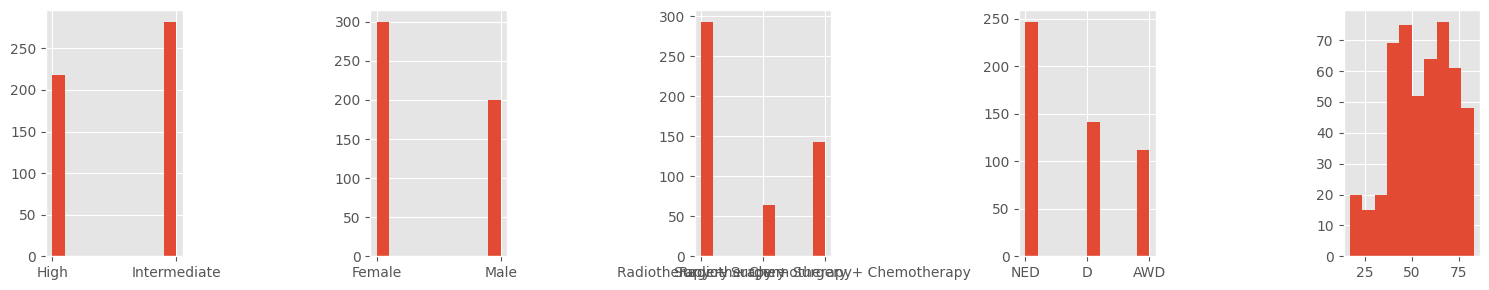

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
fig, ax = plt.subplots(1, 5, figsize=(15,3))
ax[0].hist(df.Grade)
ax[1].hist(df.Sex)
ax[2].hist(df.Treatment)
ax[3].hist(df["Status (NED, AWD, D)"])
ax[4].hist(df.Age)
plt.tight_layout()
plt.show()

In [ ]:
new_df = df[["Patient ID", "Age"]]
categorical = df.columns.drop(["Patient ID", "Age"])
for i in range(len(categorical)):
    new_df = new_df.join(pd.get_dummies(df[categorical[i]]).astype(int))

new_df.head()

,Patient ID,Age,Female,Male,High,Intermediate,epithelioid sarcoma,leiomyosarcoma,malignant solitary fibrous tumor,myxofibrosarcoma,...,parascapusular,right buttock,right parascapusular,right thigh,AWD,D,NED,Radiotherapy + Surgery,Radiotherapy + Surgery + Chemotherapy,Surgery + Chemotherapy
0,STS_001,63,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,STS_002,54,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,STS_003,22,0,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
3,STS_004,54,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
4,STS_005,63,0,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df["Age"] = scaler.fit_transform(new_df[["Age"]])

In [ ]:
x = new_df.drop(columns=["Patient ID", "AWD", "D", "NED"])
y = new_df[["AWD", "D", "NED"]]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2002)

In [ ]:
x_train

,Age,Female,Male,High,Intermediate,epithelioid sarcoma,leiomyosarcoma,malignant solitary fibrous tumor,myxofibrosarcoma,myxoid fibrosarcoma,...,left biceps,left buttock,left thigh,parascapusular,right buttock,right parascapusular,right thigh,Radiotherapy + Surgery,Radiotherapy + Surgery + Chemotherapy,Surgery + Chemotherapy
242,1.278526,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
250,-0.893305,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
429,-0.645096,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
314,1.030317,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
252,-0.583044,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,0.658003,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
329,-0.645096,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
392,-0.520991,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
402,-0.893305,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(2024)
tf.random.set_seed(2024)

model = Sequential()
model.add(Dense(units=9, input_dim=31, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["Accuracy"])

history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - Accuracy: 0.3389 - loss: 1.0991 - val_Accuracy: 0.3600 - val_loss: 1.1122
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - Accuracy: 0.4017 - loss: 1.0754 - val_Accuracy: 0.4200 - val_loss: 1.0893
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - Accuracy: 0.4664 - loss: 1.0576 - val_Accuracy: 0.5000 - val_loss: 1.0676
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - Accuracy: 0.4955 - loss: 1.0400 - val_Accuracy: 0.5600 - val_loss: 1.0448
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - Accuracy: 0.4982 - loss: 1.0209 - val_Accuracy: 0.5400 - val_loss: 1.0197
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - Accuracy: 0.5217 - loss: 0.9998 - val_Accuracy: 0.5600 - val_loss: 0.9918
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - Accuracy: 0.5265 - loss: 0.9762 - val_Accuracy: 0.6000 - val_loss: 0.9605
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - Accuracy: 0.5374 - loss: 0.9501 - val_Accuracy: 0.6200 - 

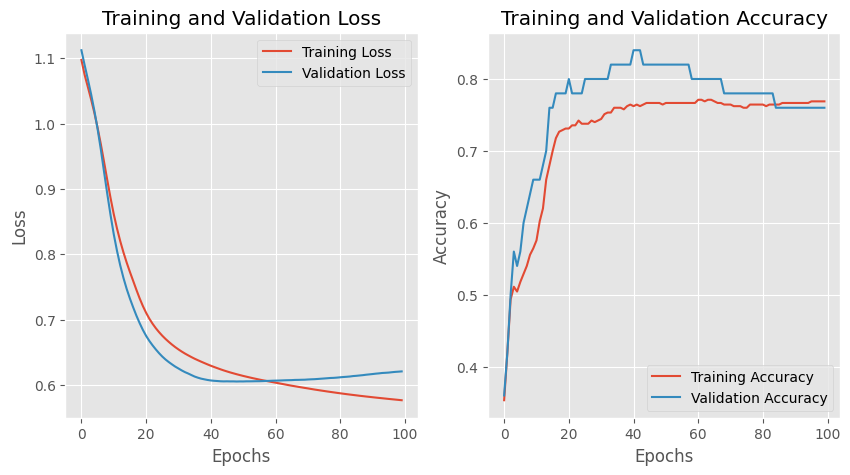

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(history.history['loss'], label='Training Loss')
ax[0].plot(history.history['val_loss'], label='Validation Loss')
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(history.history['Accuracy'], label='Training Accuracy')
ax[1].plot(history.history['val_Accuracy'], label='Validation Accuracy')
ax[1].set_title('Training and Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


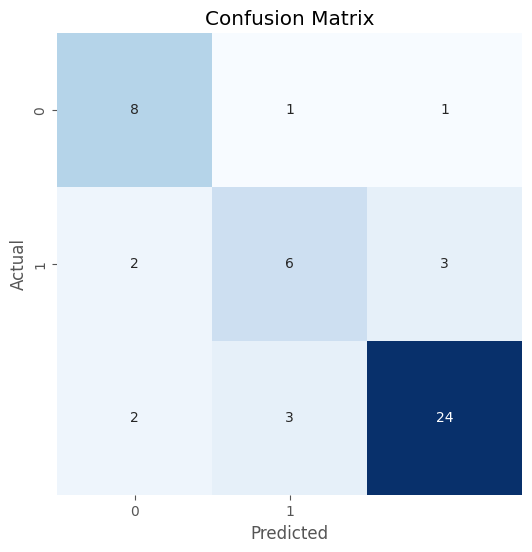

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = np.argmax(model.predict(x_test), axis=1)

conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 82.6 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 7.0.1
    Uninstalling cachetools-7.0.1:
      Successfully uninstalled cachetools-7.0.1
